In [1]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score


In [2]:
# read the dataset
url = 'https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true'
df = pd.read_csv(url)

# 1. Data Source and Contents

In [3]:
# to show the first 5 rows of the dataset
df.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [4]:
# to show no. of rows and columns
df.shape

(48842, 11)

### Data Quality Analysis (DQA) - pulled from CA3

In [5]:
# to show the non-non null count and data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [6]:
# look at unique records for each column
for col in df.columns:
    print(col, df[col].unique())

hours_per_week_bin ['b. 31-40' 'a. 0-30' 'd. 41-50 & 61-70' 'c. 71-100' 'e. 51-60']
occupation_bin ['b. Mid - Low' 'e. High' 'a. Low' 'c. Mid - Mid' 'd. Mid - High']
msr_bin ['b. Mid' 'c. High' 'a. Low']
capital_gl_bin ['c. > 0' 'a. = 0' 'b. < 0']
race_sex_bin ['c. High' 'b. Mid' 'a. Low']
education_num_bin ['c. 13' 'b. 9-12' 'a. 0-8' 'd. 14' 'e. 15+']
education_bin ['c. Bachelors' 'b. Mid' 'a. Low' 'd. Masters' 'e. High']
workclass_bin ['b. income' 'a. no income']
age_bin ['d. 36-40 & 56-60' 'e. 40-55' 'b. 26-30 & 71-100' 'c. 31-35 & 61-70'
 'a. 0-25']
flag ['train' 'test']
y [0 1]


In [7]:
# counting the frequency of each bin within each column separately
for col in df.columns:
    print(df[col].value_counts())

hours_per_week_bin
b. 31-40            26639
d. 41-50 & 61-70     9819
a. 0-30              7851
e. 51-60             3759
c. 71-100             774
Name: count, dtype: int64
occupation_bin
c. Mid - Mid     13971
b. Mid - Low     12947
e. High          12258
a. Low            7237
d. Mid - High     2429
Name: count, dtype: int64
msr_bin
c. High    22047
b. Mid     15868
a. Low     10927
Name: count, dtype: int64
capital_gl_bin
a. = 0    42525
c. > 0     4035
b. < 0     2282
Name: count, dtype: int64
race_sex_bin
c. High    29737
b. Mid     16457
a. Low      2648
Name: count, dtype: int64
education_num_bin
b. 9-12    30324
c. 13       8025
a. 0-8      6408
d. 14       2657
e. 15+      1428
Name: count, dtype: int64
education_bin
b. Mid          30324
c. Bachelors     8025
a. Low           6408
d. Masters       2657
e. High          1428
Name: count, dtype: int64
workclass_bin
b. income       46012
a. no income     2830
Name: count, dtype: int64
age_bin
e. 40-55             13963
a. 0-25

In [8]:
# THE DATA QUALITY REPORT
# Combine the missing values count, data types, and unique values into one DataFrame
data_quality_report_concise = pd.DataFrame({
    'Data Type': df.dtypes, # data types of each column
    'Missing Values': df.isnull().sum(),  # missing values count
    'Unique Values': df.nunique() # unique values count
}).join(df.describe(include='all').transpose()) # include the summary statistics

# Display the Data Quality Report
print("Data Quality Report:")
print(data_quality_report_concise)

Data Quality Report:
                   Data Type  Missing Values  Unique Values    count unique  \
hours_per_week_bin    object               0              5    48842      5   
occupation_bin        object               0              5    48842      5   
msr_bin               object               0              3    48842      3   
capital_gl_bin        object               0              3    48842      3   
race_sex_bin          object               0              3    48842      3   
education_num_bin     object               0              5    48842      5   
education_bin         object               0              5    48842      5   
workclass_bin         object               0              2    48842      2   
age_bin               object               0              5    48842      5   
flag                  object               0              2    48842      2   
y                      int64               0              2  48842.0    NaN   

                             t

Text(0.5, 1.0, 'Bar chart of the target variable (y)')

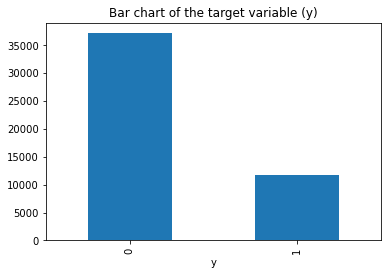

In [9]:
# to make a bar chart of the target variable (y)
df['y'].value_counts().plot(kind='bar')
plt.title('Bar chart of the target variable (y)')

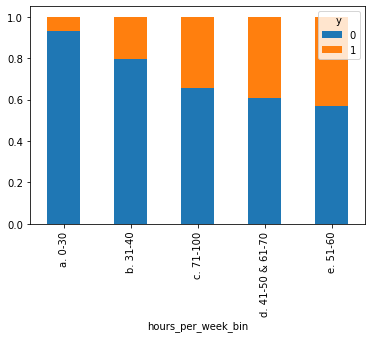

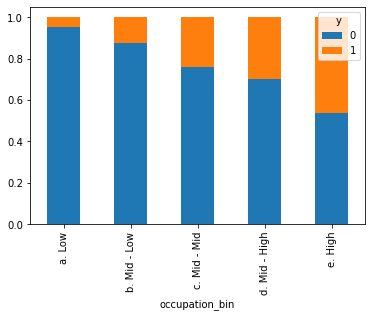

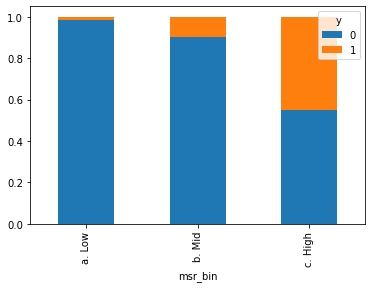

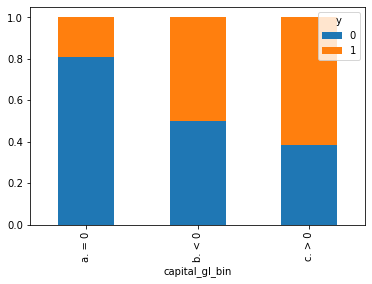

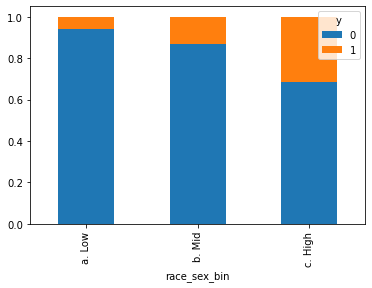

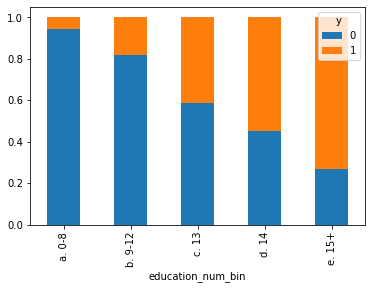

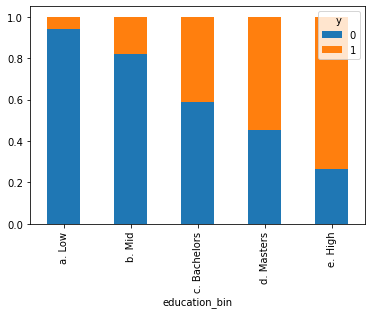

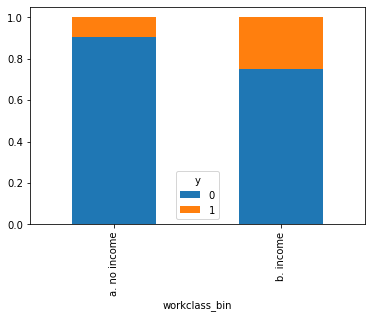

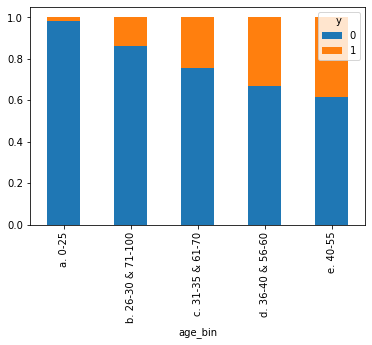

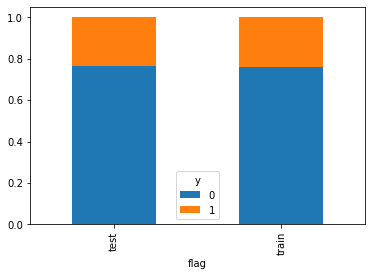

In [10]:
# the proportion of each category within each feature relative to the target variable's classes
# to make a stacked bar chart for each categorical variable based on the target variable
for col in df.select_dtypes(include=['object']).columns:
    pd.crosstab(df[col], df['y'], normalize='index').plot(kind='bar', stacked=True)
    plt.show()

In [11]:
# Splitting the dataset into features (X) and target variable (y)
X = df.drop(['y'], axis=1)
y = df['y']

# Splitting the dataset into training and testing sets based on the 'flag' column
X_train, X_test = X[df['flag'] == 'train'], X[df['flag'] == 'test']
y_train, y_test = y[df['flag'] == 'train'], y[df['flag'] == 'test']

# Remove flag from column from test and training sets
X_train = X_train.drop(['flag'], axis=1)
X_test = X_test.drop(['flag'], axis=1)

# Encoding categorical features with pd.get_dummies
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Now, X_train_encoded and X_test_encoded are ready for model training and evaluation


# 2. Finding Optimal Value of a key Ensemble Method Hyperparameter - Random Forest

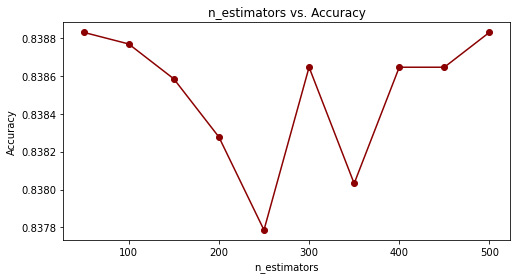

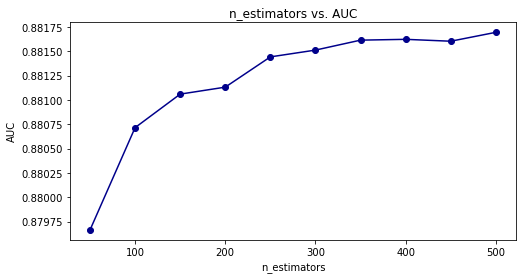

In [12]:
results = []
n_estimators_options = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Lists to store the accuracy and AUC scores for each number of estimators
accuracies = []
auc_scores = []

for trees in n_estimators_options:
    model = RandomForestClassifier(n_estimators=trees, random_state=101)
    model.fit(X_train_encoded, y_train)
    y_pred = model.predict(X_test_encoded)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    # Calculate AUC
    y_prob = model.predict_proba(X_test_encoded)[:, 1] 
    auc = roc_auc_score(y_test, y_prob)
    auc_scores.append(auc)

    results.append((trees, accuracy, auc))

# Plot for Accuracy vs. n_estimators
plt.figure(figsize=(8, 4))
pd.Series(accuracies, n_estimators_options).plot(color="darkred", marker="o")
plt.title('n_estimators vs. Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

# Plot for AUC vs. n_estimators
plt.figure(figsize=(8, 4))
pd.Series(auc_scores, n_estimators_options).plot(color="darkblue", marker="o")
plt.title('n_estimators vs. AUC')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.show()


# 3. Random Forest QA

1. The first graph shows Random Forest's accuracy vs n_estimators which declines from n = 50 to 250 but quickly peaks again at n= 300 and n= 500. As for the AUC has a slow increase and peaks at 500. The increase from n=300 to 500 is only a subtle performance increase. The argument can be made that its not worth the computational effort.


2. All things considered n=300 provides a good trade off between performance and computational resouces. If resources are not a consideration n=500 would provide the highest accuracy and auc. 

# 2B - AdaBoost

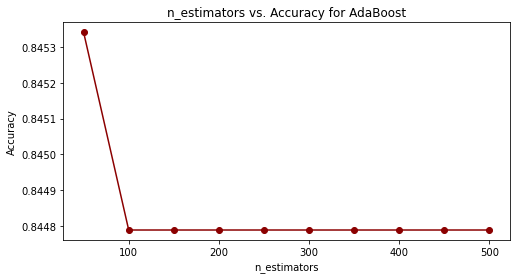

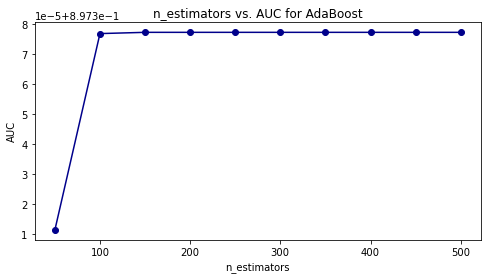

In [13]:
results = []
n_estimators_options = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Lists to store the accuracy and AUC scores for each number of estimators
accuracies = []
auc_scores = []

for trees in n_estimators_options:
    # Initialize AdaBoostClassifier with the current number of estimators
    model = AdaBoostClassifier(n_estimators=trees, random_state=101)
    model.fit(X_train_encoded, y_train)
    y_pred = model.predict(X_test_encoded)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    # Calculate AUC
    y_prob = model.predict_proba(X_test_encoded)[:, 1] # Get probability scores for the positive class
    auc = roc_auc_score(y_test, y_prob)
    auc_scores.append(auc)

    results.append((trees, accuracy, auc))

# Plot for Accuracy vs. n_estimators for AdaBoost
plt.figure(figsize=(8, 4))
pd.Series(accuracies, n_estimators_options).plot(color="darkred", marker="o")
plt.title('n_estimators vs. Accuracy for AdaBoost')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

# Plot for AUC vs. n_estimators for AdaBoost
plt.figure(figsize=(8, 4))
pd.Series(auc_scores, n_estimators_options).plot(color="darkblue", marker="o")
plt.title('n_estimators vs. AUC for AdaBoost')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.show()


# 3B - AdaBoost

1. At first look, it looks like there is a somewhat inverse relationship between auc and accuracy as accuracy decreases with num of estimators whereas AUC increases. Both metrics plateau at n=100. Accuracy decreases but only by of .05 of a percent. 


2. The optimal value of the estimator would be n=100 as only gradually increases in performance by an inconsequential amount. 

# 2C - Gradient Boost

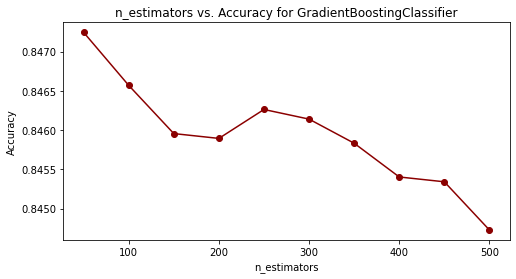

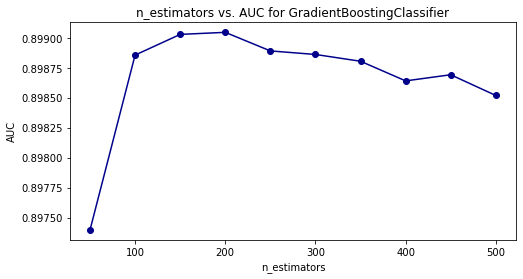

In [14]:
results = []
n_estimators_options = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Lists to store the accuracy and AUC scores for each number of estimators
accuracies = []
auc_scores = []

for trees in n_estimators_options:
    # Initialize GradientBoostingClassifier with the current number of estimators
    model = GradientBoostingClassifier(n_estimators=trees, random_state=101)
    model.fit(X_train_encoded, y_train)
    y_pred = model.predict(X_test_encoded)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    # Calculate AUC
    y_prob = model.predict_proba(X_test_encoded)[:, 1] # Get probability scores for the positive class
    auc = roc_auc_score(y_test, y_prob)
    auc_scores.append(auc)

    results.append((trees, accuracy, auc))

# Plot for Accuracy vs. n_estimators for GradientBoostingClassifier
plt.figure(figsize=(8, 4))
pd.Series(accuracies, n_estimators_options).plot(color="darkred", marker="o")
plt.title('n_estimators vs. Accuracy for GradientBoostingClassifier')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

# Plot for AUC vs. n_estimators for GradientBoostingClassifier
plt.figure(figsize=(8, 4))
pd.Series(auc_scores, n_estimators_options).plot(color="darkblue", marker="o")
plt.title('n_estimators vs. AUC for GradientBoostingClassifier')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.show()


# 3C - Gradient Boost

1. The accuracy of gradient boost starts off as a peak at n = 50, decreases then with a slight increase around n = 250 then continues to decrease until n = 500. For the AUC it quickly increases from n=50 tp n= 100 increases a bit then decreases till n=500.


2. The optimal num of estimators is about n=100 as it is a good balance between AUC and Accuracy.

# 2D - XGB

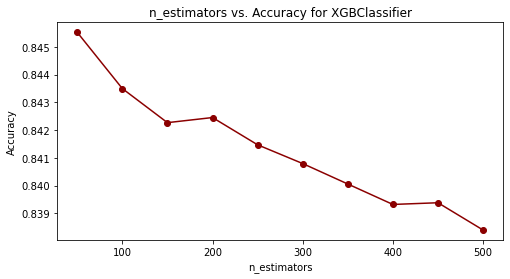

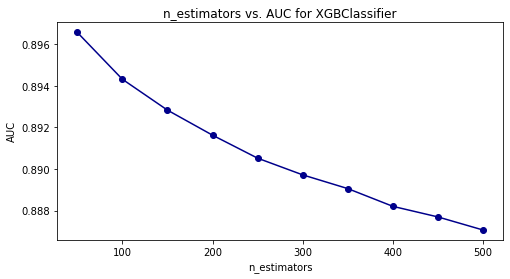

In [15]:
# Example of renaming the columns to remove brackets and less-than symbols
X_train_encoded.columns = [col.replace('[', '').replace(']', '').replace('<', 'lt_') for col in X_train_encoded.columns]
X_test_encoded.columns = [col.replace('[', '').replace(']', '').replace('<', 'lt_') for col in X_test_encoded.columns]

n_estimators_options = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
accuracy_results = []
auc_results = []

for trees in n_estimators_options:
    model = XGBClassifier(n_estimators=trees, random_state=101, use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train_encoded, y_train)
    y_pred = model.predict(X_test_encoded)
    y_prob = model.predict_proba(X_test_encoded)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    accuracy_results.append(accuracy)
    auc_results.append(auc)

# Plot for Accuracy vs. n_estimators
plt.figure(figsize=(8, 4))
pd.Series(accuracy_results, n_estimators_options).plot(color="darkred", marker="o")
plt.title('n_estimators vs. Accuracy for XGBClassifier')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

# Plot for AUC vs. n_estimators
plt.figure(figsize=(8, 4))
pd.Series(auc_results, n_estimators_options).plot(color="darkblue", marker="o")
plt.title('n_estimators vs. AUC for XGBClassifier')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.show()

# 3D - XGB

1. Both graphs are decreasing as n_estimators are increasing. The more complex the model gets the performance plummets. 


2. As it decreases with the number of estimators the optimal amount of estimators is on the lower end of about n=50. 

In [16]:
# Optimal number of estimators for each classifier
optimal_n_estimators = {
    'Random Forest': 300,
    'AdaBoost': 100,
    'Gradient Boost': 100,
    'XGB': 50
}

# Initialize classifiers with the optimal number of estimators
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=optimal_n_estimators['Random Forest'], random_state=101),
    'AdaBoost': AdaBoostClassifier(n_estimators=optimal_n_estimators['AdaBoost'], random_state=101),
    'Gradient Boost': GradientBoostingClassifier(n_estimators=optimal_n_estimators['Gradient Boost'], random_state=101),
    'XGB': XGBClassifier(n_estimators=optimal_n_estimators['XGB'], random_state=101, use_label_encoder=False, eval_metric='logloss')
}

# Data structure to hold results
data = {
    'Random Forest': [None, None],
    'AdaBoost': [None, None],
    'Gradient Boost': [None, None],
    'XGB': [None, None]
}

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(X_train_encoded, y_train)
    
    # Predict on the test set
    y_pred = classifier.predict(X_test_encoded)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate AUC
    y_prob = classifier.predict_proba(X_test_encoded)[:, 1] # Probability scores for the positive class
    auc = roc_auc_score(y_test, y_prob)
    
    # Update the results in the data structure
    data[name] = [accuracy, auc]

# Creating DataFrame from the results
index = ['Accuracy', 'AUC']
df = pd.DataFrame(data, index=index)

In [17]:
df

,Random Forest,AdaBoost,Gradient Boost,XGB
Accuracy,0.838646,0.844788,0.846570,0.845525
AUC,0.881511,0.897377,0.898856,0.896576
